In [78]:
import json
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key_NBA_marco

In [53]:
teamlist_id = [1,2,4,5,6,7,8,9,10,11,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,38,40,41]
teamlist_names = ["Atlanta Hawks","Boston Celtics","Brooklyn Nets","Charlotte Hornets","Chicago Bulls","Cleveland Cavaliers","Dallas Mavericks","Denver Nuggets","Detroit Pistons","Golden State Warriors","Houston Rockets","Indiana Pacers","LA Clippers","Los Angeles Lakers","Memphis Grizzlies","Miami Heat","Milwaukee Bucks","Minnesota Timberwolves","New Orleans Pelicans","New York Knicks","Oklahoma City Thunder","Orlando Magic","Philadelphia 76ers","Phoenix Suns","Portland Trail Blazers","Sacramento Kings","San Antonio Spurs","Toronto Raptors","Utah Jazz","Washington Wizards"]

In [77]:
teams_df = pd.DataFrame({
"Team Id": teamlist_id,
"Team Name": teamlist_names
})
teams_df.head(15)

,Team Id,Team Name
0,1,Atlanta Hawks
1,2,Boston Celtics
2,4,Brooklyn Nets
3,5,Charlotte Hornets
4,6,Chicago Bulls
5,7,Cleveland Cavaliers
6,8,Dallas Mavericks
7,9,Denver Nuggets
8,10,Detroit Pistons
9,11,Golden State Warriors


In [79]:
teamID = input("Choose a team from above ")
team_url = "https://api-nba-v1.p.rapidapi.com/players/teamId"
query_url = f"{team_url}/{teamID}"

Choose a team from above 11


In [80]:
team_response = requests.get(query_url,
  headers={
    "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com",
    "X-RapidAPI-Key": api_key_NBA_marco
  }
)

In [81]:
team_details = team_response.json()
players = team_details["api"]["players"]

In [82]:
player_list_id = []
player_list_first_name = []
player_list_last_name = []

for player in players:
    player_list_id.append(player["playerId"])
    player_list_first_name.append(player["firstName"])
    player_list_last_name.append(player["lastName"])

In [83]:
df = pd.DataFrame({
"Player Id": player_list_id,
"Name": player_list_first_name,
"Last Name": player_list_last_name
})
df

,Player Id,Name,Last Name
0,61,Andrew,Bogut
1,84,Alec,Burks
2,97,Willie,Cauley-Stein
3,124,Stephen,Curry
4,204,Draymond,Green
5,270,Jonas,Jerebko
6,321,Shaun,Livingston
7,322,Kevon,Looney
8,381,Xavier,Munford
9,451,Glenn,Robinson III


In [84]:
player_data = []
for player in player_list_id:
    player_response = requests.get(f"https://api-nba-v1.p.rapidapi.com/statistics/players/playerId/{player}", headers={"X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com","X-RapidAPI-Key": api_key_NBA_marco})
    print(f"Processing {player} {player_response}")
    player_json = player_response.json()
    player_data.append(player_json)

Processing 61 <Response [200]>
Processing 84 <Response [200]>
Processing 97 <Response [200]>
Processing 124 <Response [200]>
Processing 204 <Response [200]>
Processing 270 <Response [200]>
Processing 321 <Response [200]>
Processing 322 <Response [200]>
Processing 381 <Response [200]>
Processing 451 <Response [200]>
Processing 462 <Response [200]>
Processing 514 <Response [200]>
Processing 543 <Response [200]>
Processing 599 <Response [200]>
Processing 835 <Response [200]>
Processing 959 <Response [200]>
Processing 967 <Response [200]>
Processing 1028 <Response [200]>
Processing 1177 <Response [200]>
Processing 1182 <Response [200]>
Processing 1186 <Response [200]>
Processing 1187 <Response [200]>
Processing 1190 <Response [200]>
Processing 1191 <Response [200]>
Processing 1195 <Response [200]>
Processing 1205 <Response [200]>
Processing 1207 <Response [200]>
Processing 1208 <Response [200]>
Processing 1213 <Response [200]>
Processing 1220 <Response [200]>
Processing 1222 <Response [200

In [85]:
season_response = requests.get("https://api-nba-v1.p.rapidapi.com/games/seasonYear/2018",
  headers={
    "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com",
    "X-RapidAPI-Key": api_key_NBA_marco
  }
)

In [86]:
season_details = season_response.json()
season_details["api"]["results"]

1868

In [87]:
games = []
leagues = []
for g in season_details["api"]["games"]:
    games.append(g["gameId"])
    leagues.append(g["league"])

In [88]:
games = pd.to_numeric(games)

In [89]:
games_df = pd.DataFrame({
"Game": games,
"League": leagues
})
games_df.head()
#aquí se filtrarian las ligas necesarias, por ahora se están considerando todas las ligas

,Game,League
0,5706,utah
1,5707,utah
2,5618,sacramento
3,5619,sacramento
4,5708,utah


In [90]:
game_ids = []
player_ids = []
plusminus = []
minutes = []

for o in player_data:
    for f in o["api"]["statistics"]:
        f["gameId"] = pd.to_numeric(f["gameId"])
        if f["gameId"] in games:
            game_ids.append(f["gameId"])
            player_ids.append(f["playerId"])
            plusminus.append(f["plusMinus"])
            minutes.append(f["min"])

In [91]:
df3 = pd.DataFrame({
"Game": game_ids,
"Player Id": player_ids,
"+/-": plusminus,
"Min": minutes
})
df3.head()
#ya que tomamos una muestra de jugadores, estos no participan en todos los juegos, es correcto que reduzcan los datos

,Game,Player Id,+/-,Min
0,4318,61,-12,30:26
1,5441,61,-2,19:05
2,5448,61,-9,12:59
3,5465,61,-12,9:00
4,5487,61,0,23:57


In [92]:
df3[["Min", "Seg"]] = df3["Min"].str.split(":", expand = True)
df3.head()

,Game,Player Id,+/-,Min,Seg
0,4318,61,-12,30,26
1,5441,61,-2,19,05
2,5448,61,-9,12,59
3,5465,61,-12,9,00
4,5487,61,0,23,57


In [93]:
df3["+/-"] = pd.to_numeric(df3["+/-"])
df3["Min"] = pd.to_numeric(df3["Min"])
df3["Seg"] = pd.to_numeric(df3["Seg"])
total_minutes = df3["Min"] + df3["Seg"]/60
df3["Minutes"] = total_minutes
weighed_plusminus = df3["+/-"]*df3["Minutes"]
df3["Minutes"] = total_minutes
df3["Weighed +/-"] = weighed_plusminus
df3.head()

,Game,Player Id,+/-,Min,Seg,Minutes,Weighed +/-
0,4318,61,-12.0,30.0,26.0,30.433333,-365.200000
1,5441,61,-2.0,19.0,5.0,19.083333,-38.166667
2,5448,61,-9.0,12.0,59.0,12.983333,-116.850000
3,5465,61,-12.0,9.0,0.0,9.000000,-108.000000
4,5487,61,0.0,23.0,57.0,23.950000,0.000000


In [94]:
grouped_df3 = df3.groupby(["Player Id"])
grouped_players = grouped_df3["Game"].count()
grouped_plusminus = grouped_df3["+/-"].mean()
grouped_minutes = grouped_df3["Minutes"].sum()
grouped_weighed = grouped_df3["Weighed +/-"].sum()

In [95]:
df5 = pd.DataFrame({
"Games Played": grouped_players,
"Average +/-": grouped_plusminus,
"Minutes Played": grouped_minutes,
"Total Weighed +/-": grouped_weighed
})
df5.head()

,Games Played,Average +/-,Minutes Played,Total Weighed +/-
Player Id,,,,
1028,65,-4.4375,1093.316667,-5184.733333
1177,8,-1.2500,16.016667,-44.450000
1186,8,-3.6250,72.100000,-483.483333
1187,8,0.2500,99.066667,-56.700000
1190,8,-2.8750,80.833333,-201.650000


In [96]:
df6 = pd.merge(df, df5, on = "Player Id")
df6.head()
#la disminución en el número de jugadores se debe a que se seleccionarion juegos de la temporada 2018 únicamente

,Player Id,Name,Last Name,Games Played,Average +/-,Minutes Played,Total Weighed +/-
0,61,Andrew,Bogut,34,-0.382353,343.350000,-17.333333
1,84,Alec,Burks,81,-2.987654,1452.616667,-6232.816667
2,97,Willie,Cauley-Stein,86,0.534884,2303.050000,2476.416667
3,124,Stephen,Curry,96,8.489583,3287.500000,26002.800000
4,204,Draymond,Green,92,6.604396,2955.966667,18978.933333


In [97]:
df6["Factor"] = df6["Total Weighed +/-"]/df6["Games Played"]
df6.sort_values(by = "Factor", ascending = False)
#sería recomendable discriminar a jugadores que tengan muy pocos games played, para poder comparar en condiciones similares

,Player Id,Name,Last Name,Games Played,Average +/-,Minutes Played,Total Weighed +/-,Factor
3,124,Stephen,Curry,96,8.489583,3287.500000,26002.800000,270.862500
4,204,Draymond,Green,92,6.604396,2955.966667,18978.933333,206.292754
10,514,Klay,Thompson,107,4.190476,3549.716667,12780.666667,119.445483
7,322,Kevon,Looney,106,3.647619,1979.866667,7578.633333,71.496541
21,1205,Jordan,Howard,8,1.375000,50.550000,256.316667,32.039583
2,97,Willie,Cauley-Stein,86,0.534884,2303.050000,2476.416667,28.795543
23,1222,Nuni,Omot,8,-1.250000,103.633333,186.316667,23.289583
5,270,Jonas,Jerebko,105,0.190476,1392.433333,1596.000000,15.200000
24,1226,Jeff,Roberson,8,1.500000,51.216667,117.850000,14.731250
6,321,Shaun,Livingston,92,0.043956,1321.550000,359.500000,3.907609


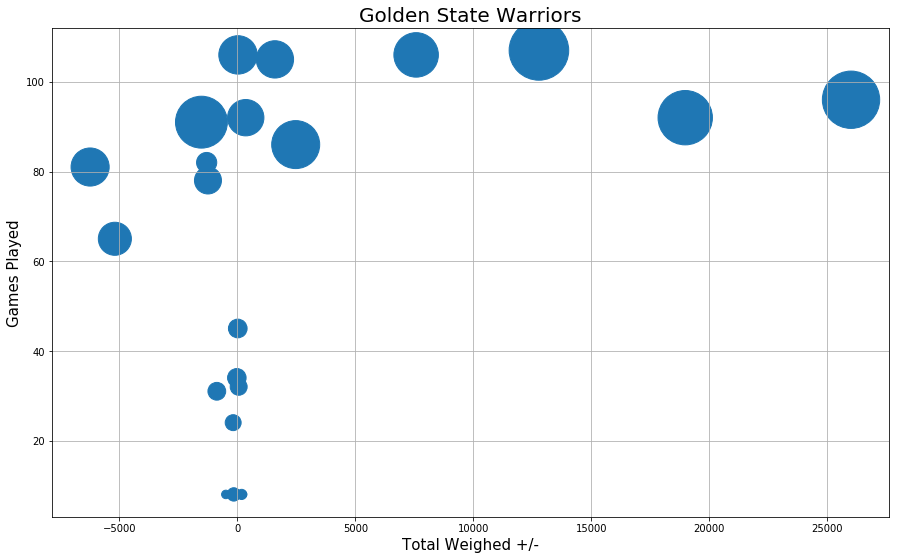

In [98]:
teams_df["Team Id"] = pd.to_numeric(teams_df["Team Id"])
teamID = pd.to_numeric(teamID)
team_name = teams_df.loc[teams_df["Team Id"] == teamID, "Team Name"]
gamesvstotalweighed = plt.scatter(df6["Total Weighed +/-"], df6["Games Played"], s = df6["Minutes Played"])
fig = plt.gcf()
fig.set_size_inches(15, 9)
plt.xlabel("Total Weighed +/-", fontsize = 15)
plt.ylabel("Games Played", fontsize = 15)
plt.title(f"{team_name.item()}", fontsize = 20)
plt.grid()
plt.show()
plt.savei